<a href="https://colab.research.google.com/github/VivekLakum/AIML-B_45-2303A52009/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sys import version
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car',version=2,parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [ ]:
car_data.details['version']

'2'

In [ ]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(car_data,test_size=0.3,random_state=20)
print('The size of training data is : {}\nThe size of testing data is : {}'.format(len(train_data),len(test_data)))

The size of training data is : 1209
The size of testing data is : 519


In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [ ]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [ ]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [ ]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [ ]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='buying', ylabel='count'>

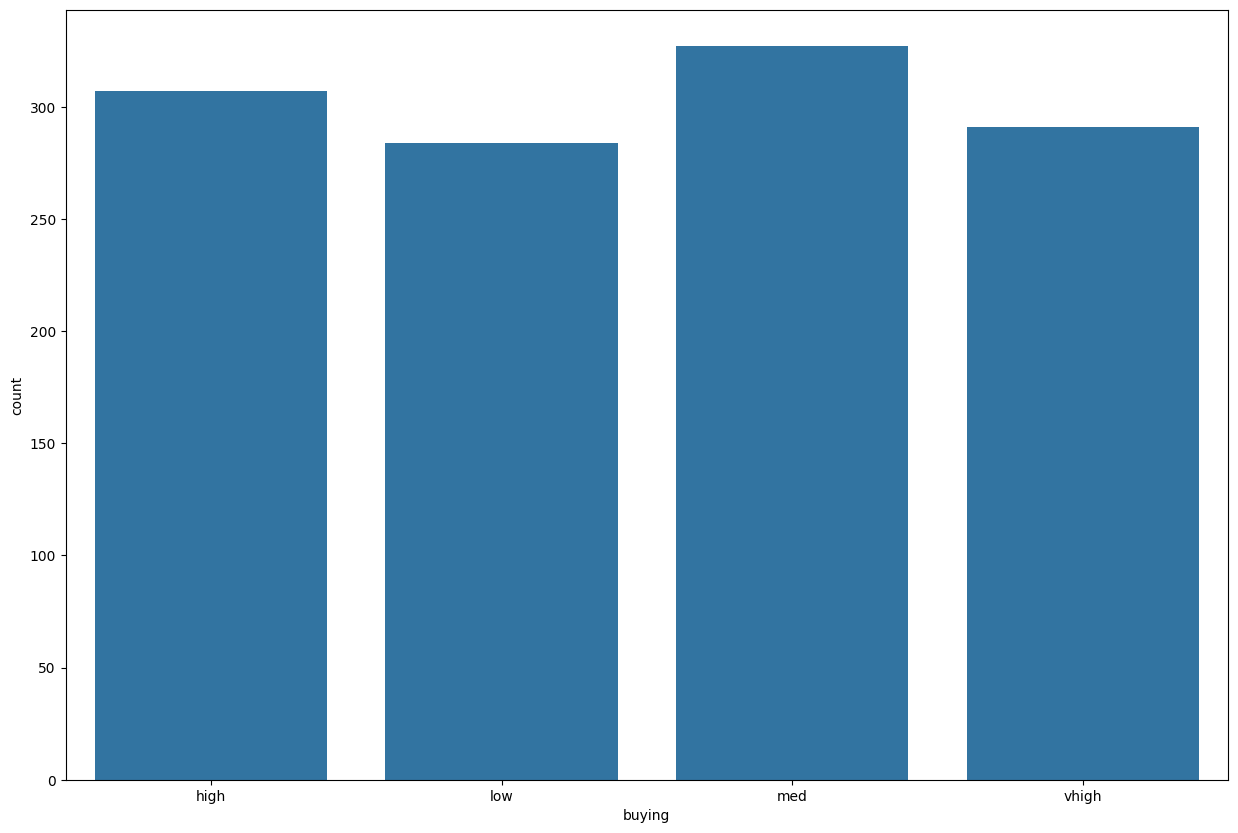

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='buying', ylabel='count'>

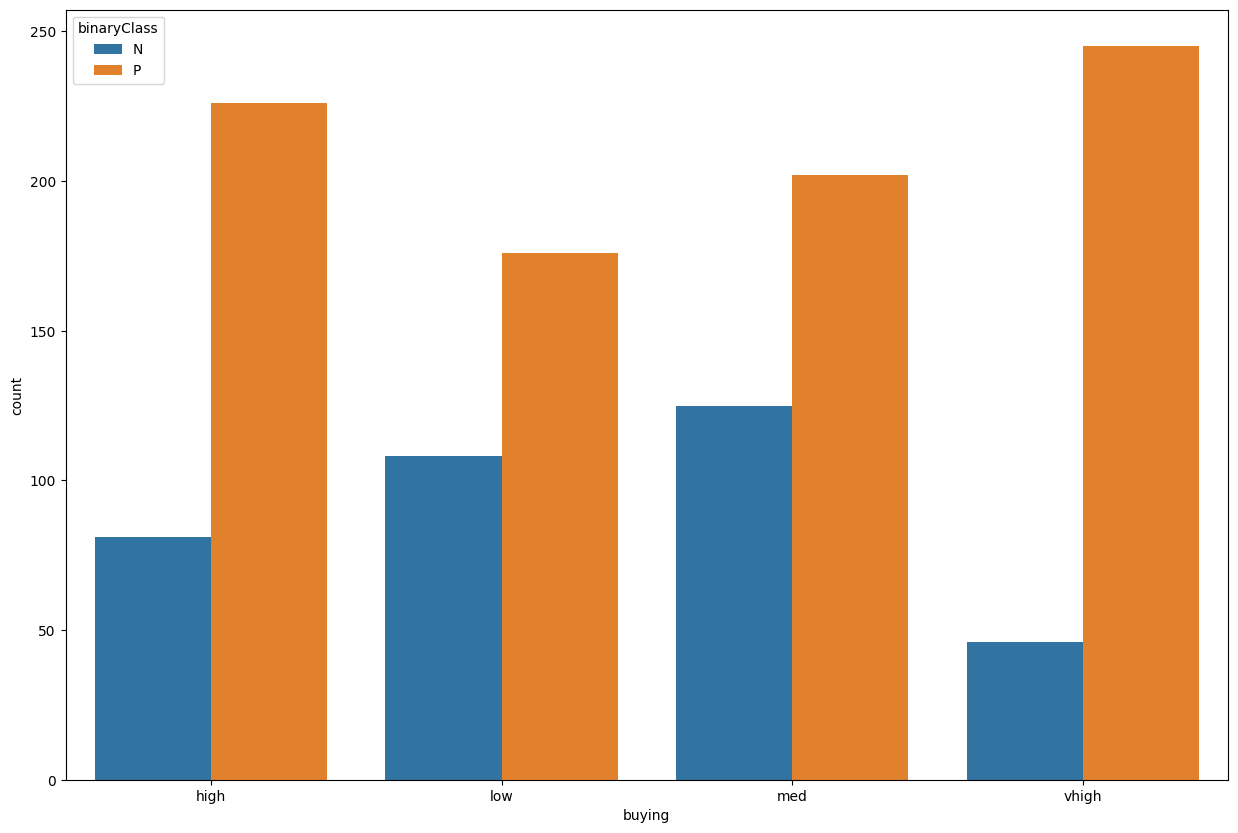

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying',hue='binaryClass')

In [ ]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


<Axes: xlabel='maint', ylabel='count'>

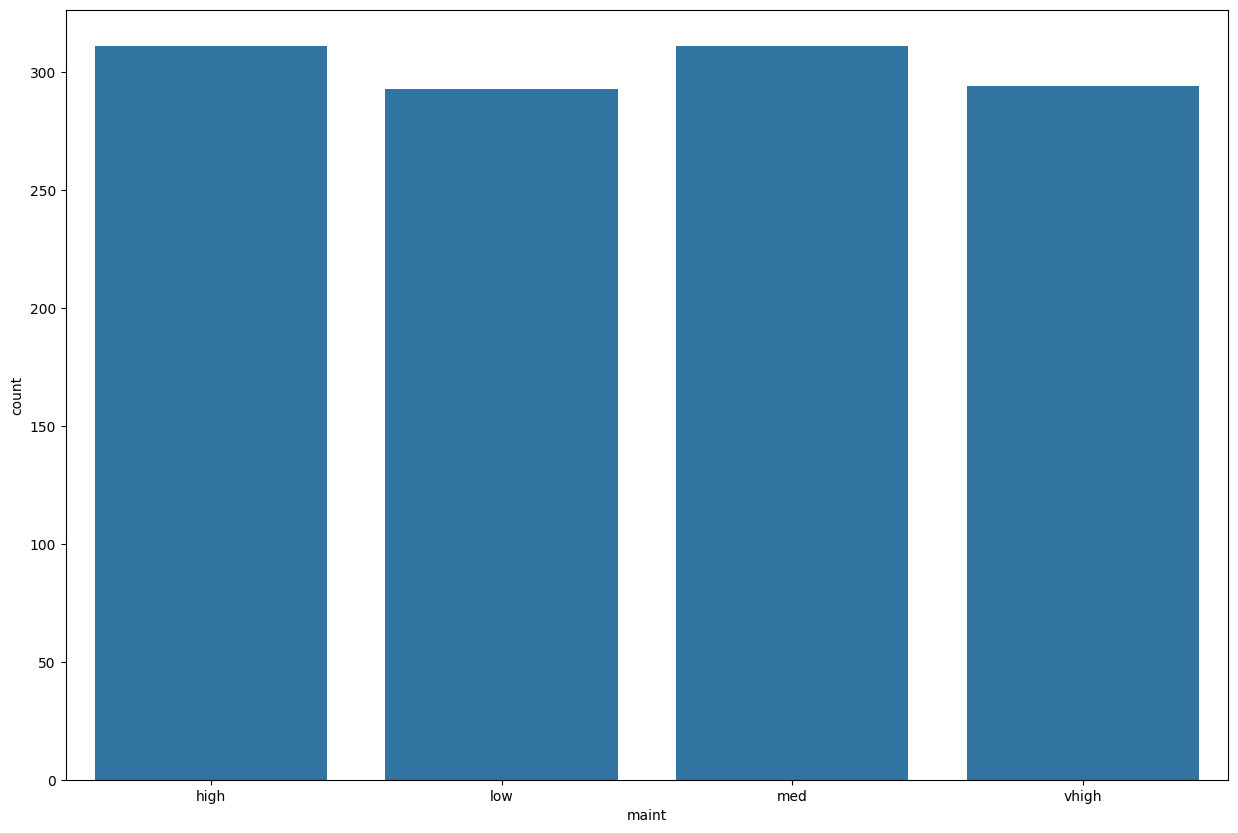

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='maint')

<Axes: xlabel='maint', ylabel='count'>

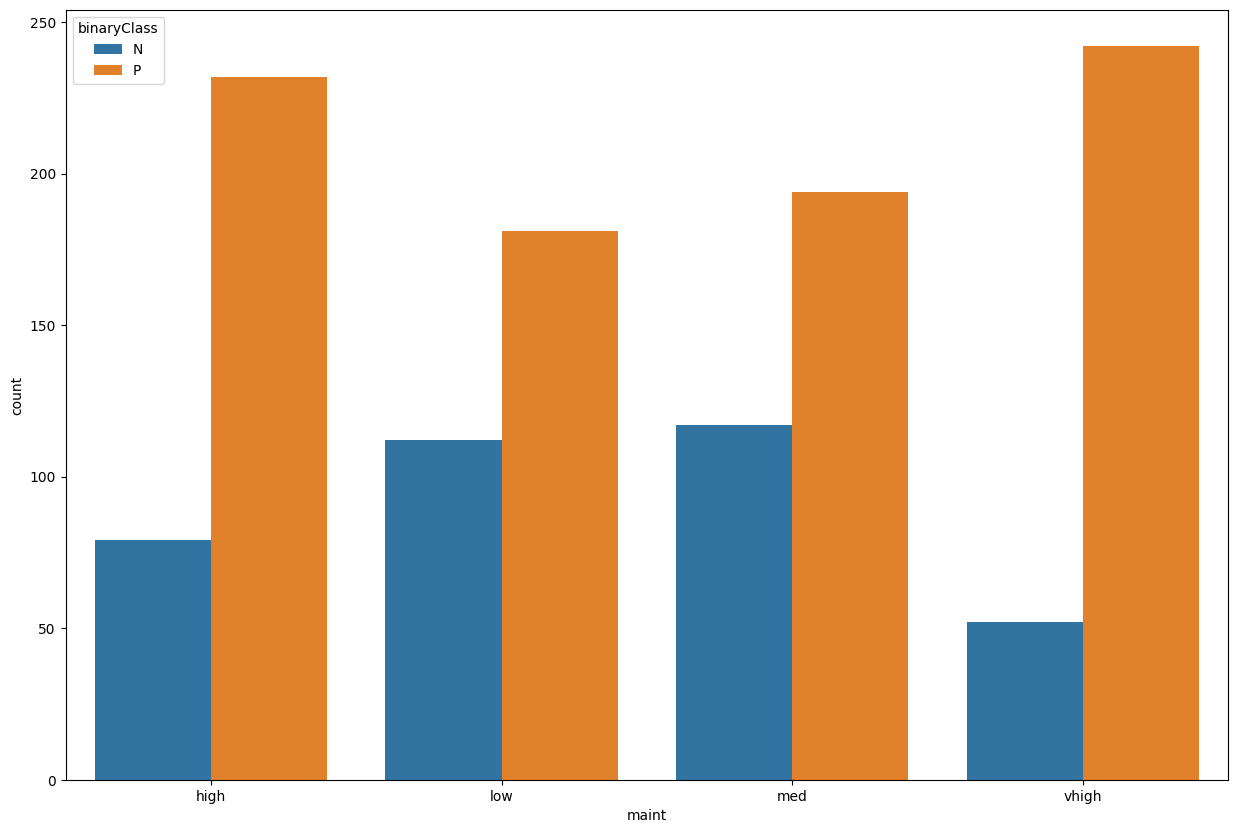

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='maint',hue='binaryClass')

In [ ]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


<Axes: xlabel='doors', ylabel='count'>

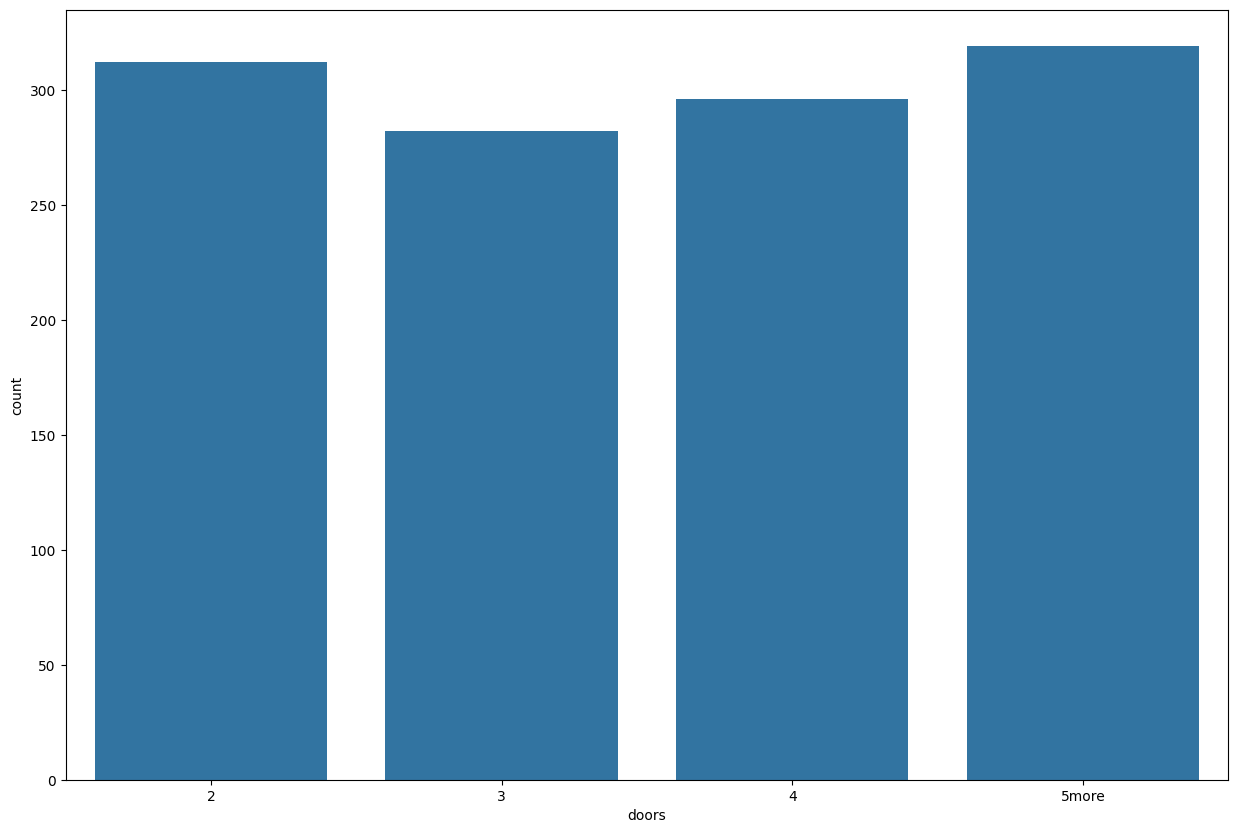

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='doors')

<Axes: xlabel='doors', ylabel='count'>

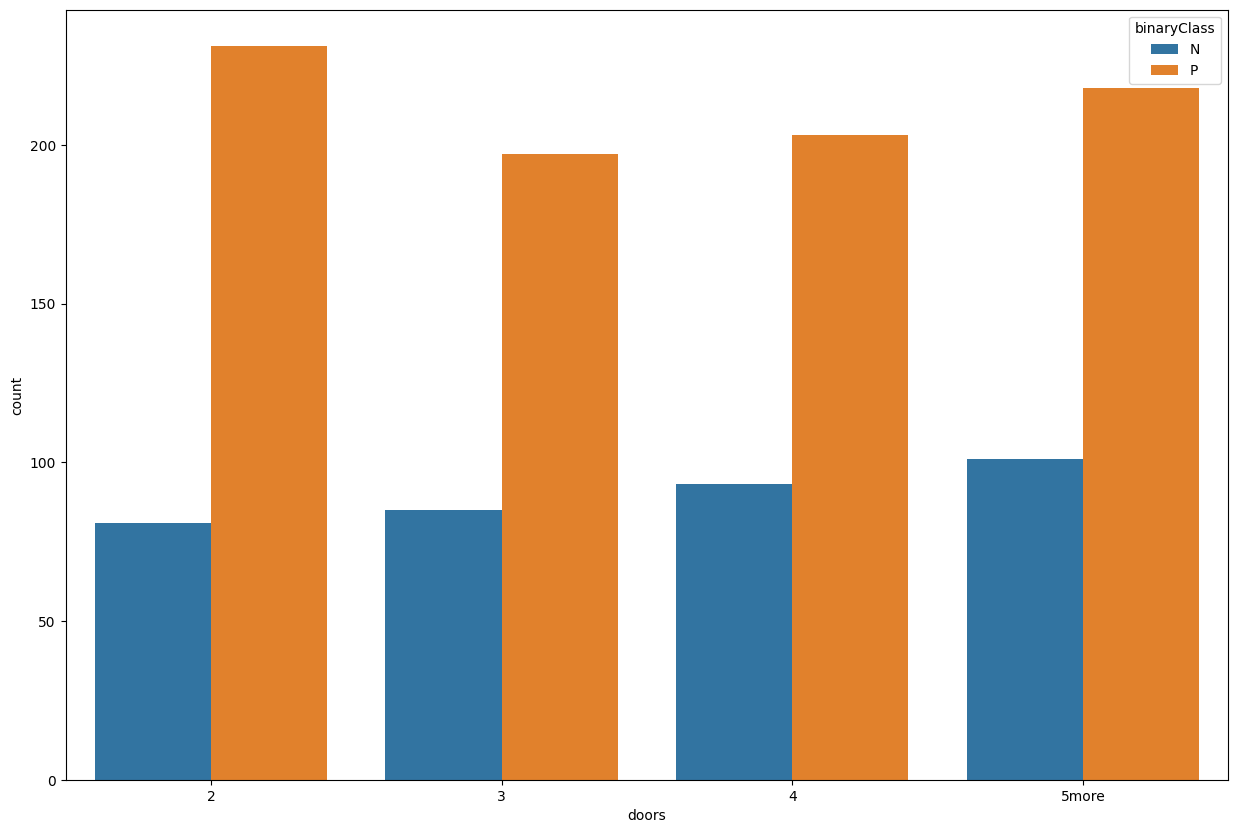

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='doors',hue='binaryClass')

In [ ]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='persons', ylabel='count'>

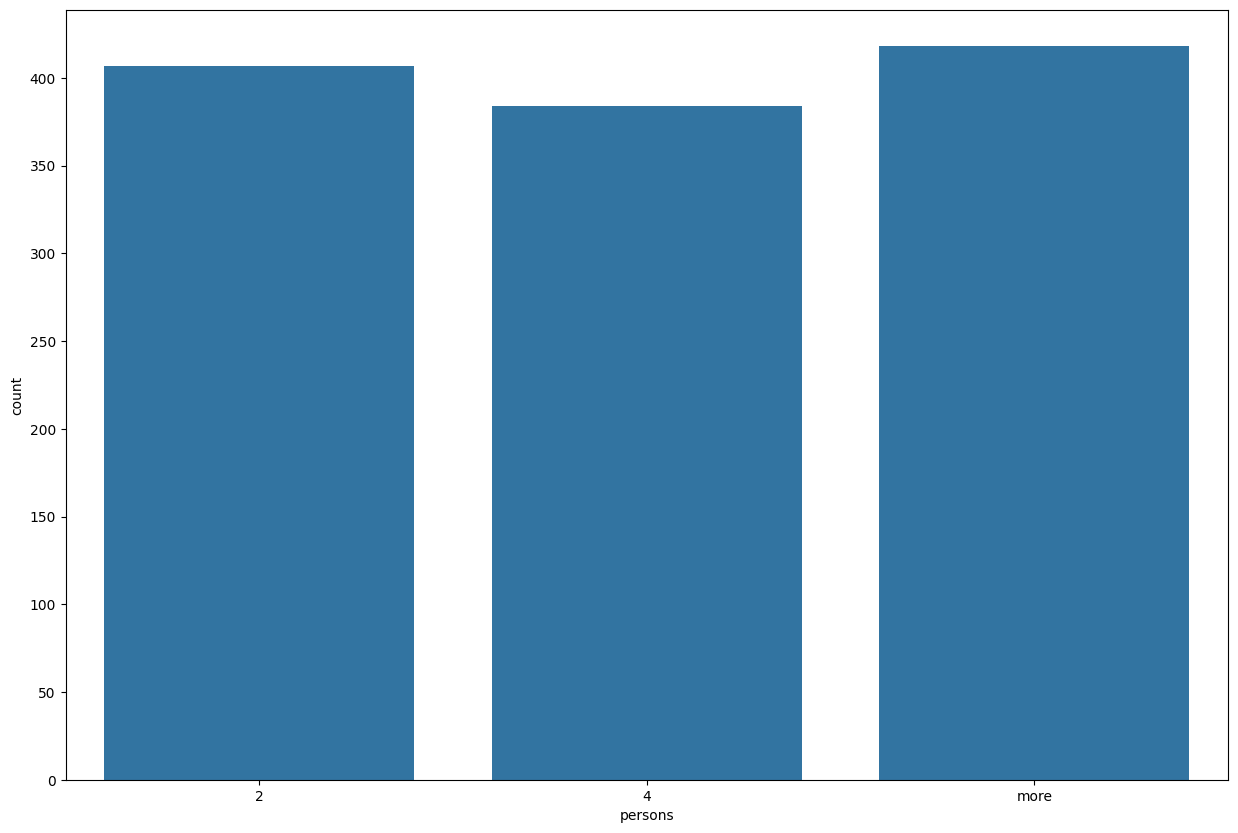

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='persons')

<Axes: xlabel='persons', ylabel='count'>

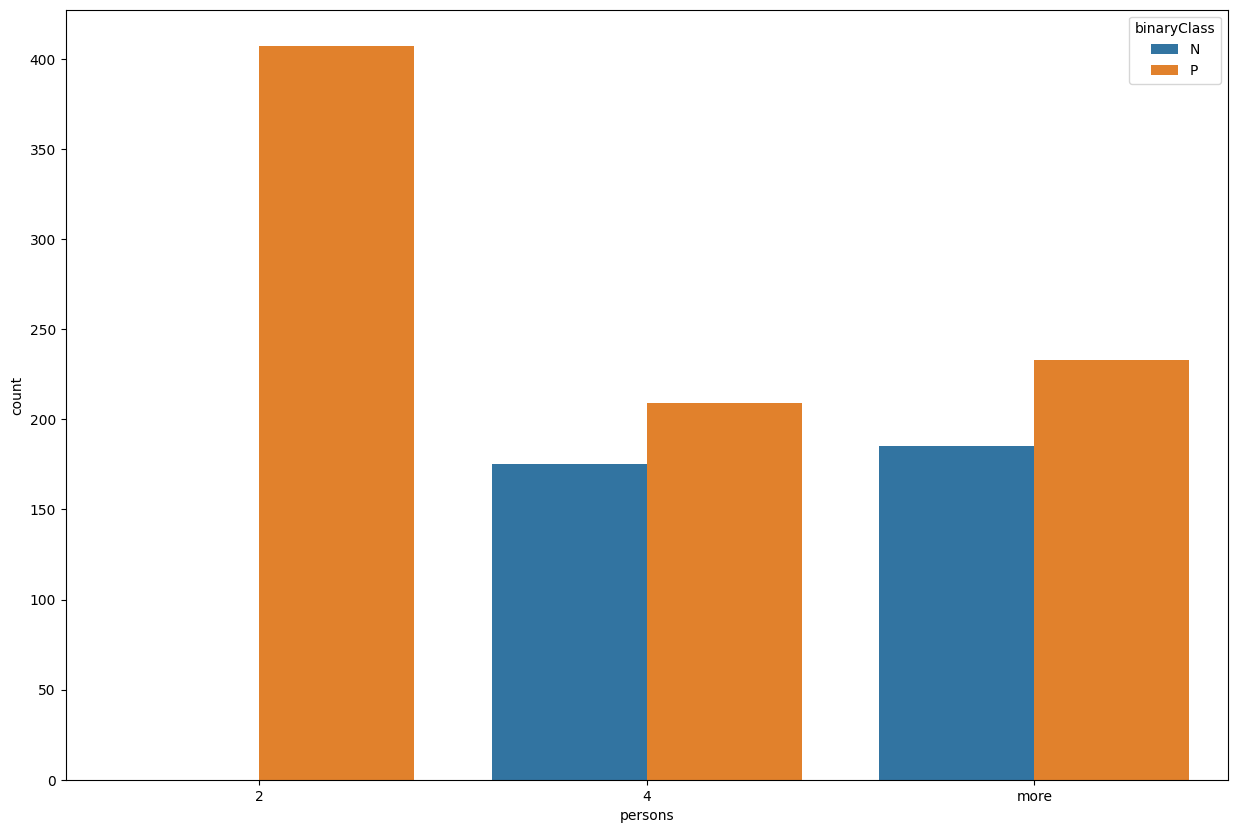

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='persons',hue='binaryClass')

In [ ]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
big,411
med,405
small,393


<Axes: xlabel='lug_boot', ylabel='count'>

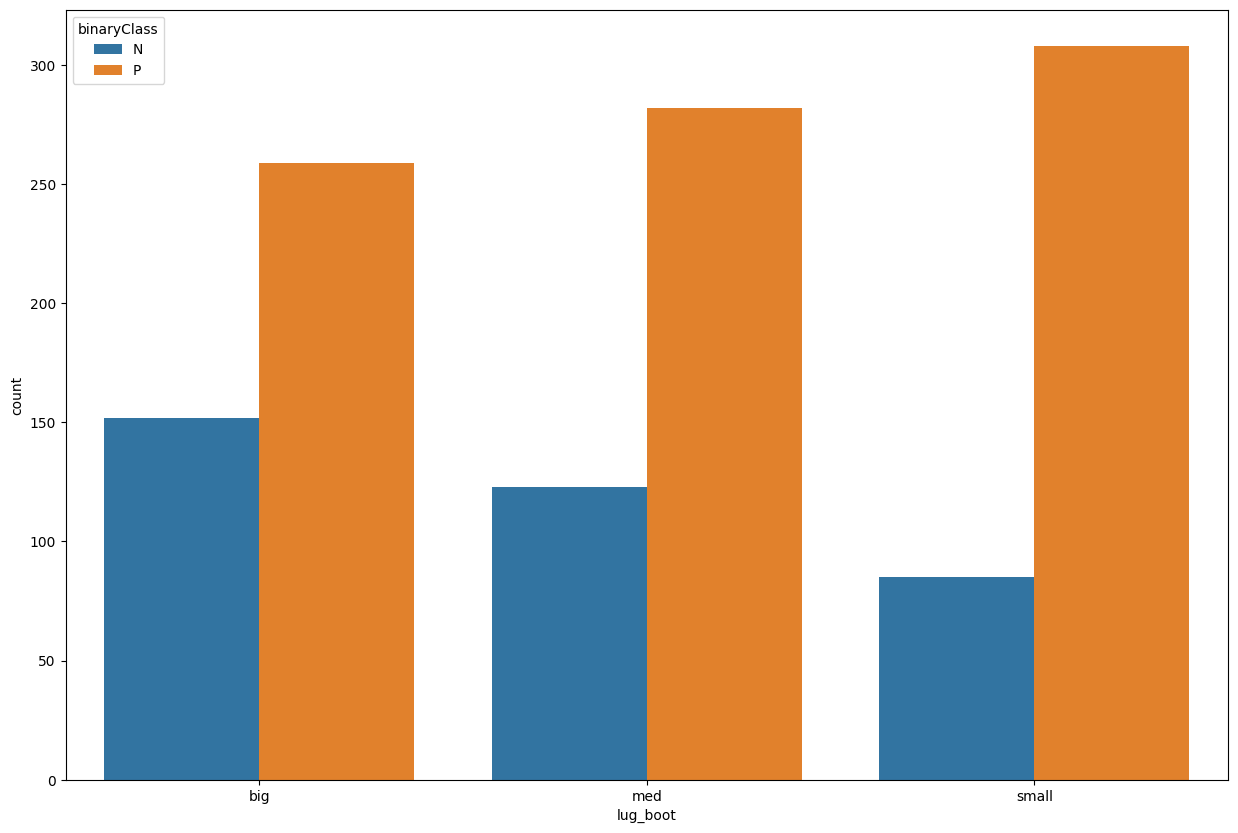

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='lug_boot',hue='binaryClass')

In [ ]:
train_data['safety'].value_counts()

,count
safety,
med,406
low,402
high,401


<Axes: xlabel='safety', ylabel='count'>

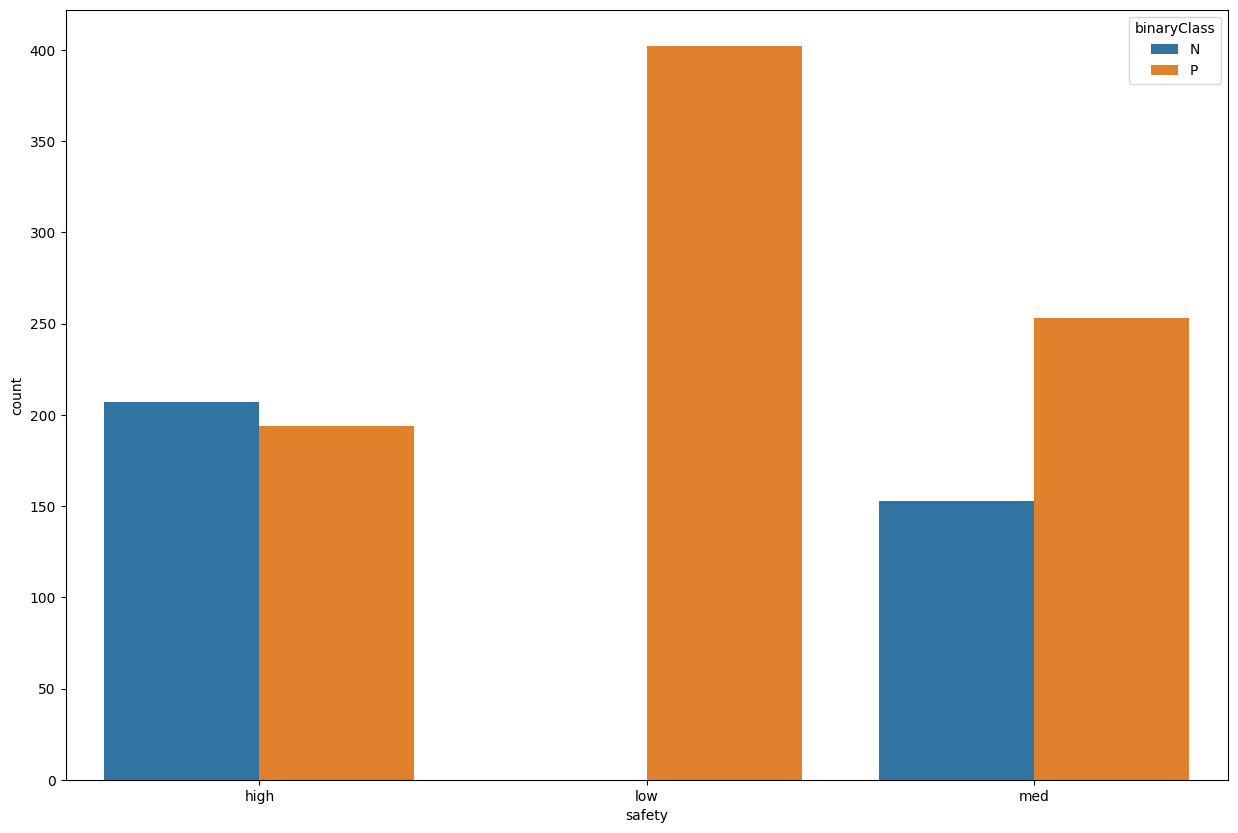

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='safety',hue='binaryClass')

In [ ]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,849
N,360


<Axes: xlabel='binaryClass', ylabel='count'>

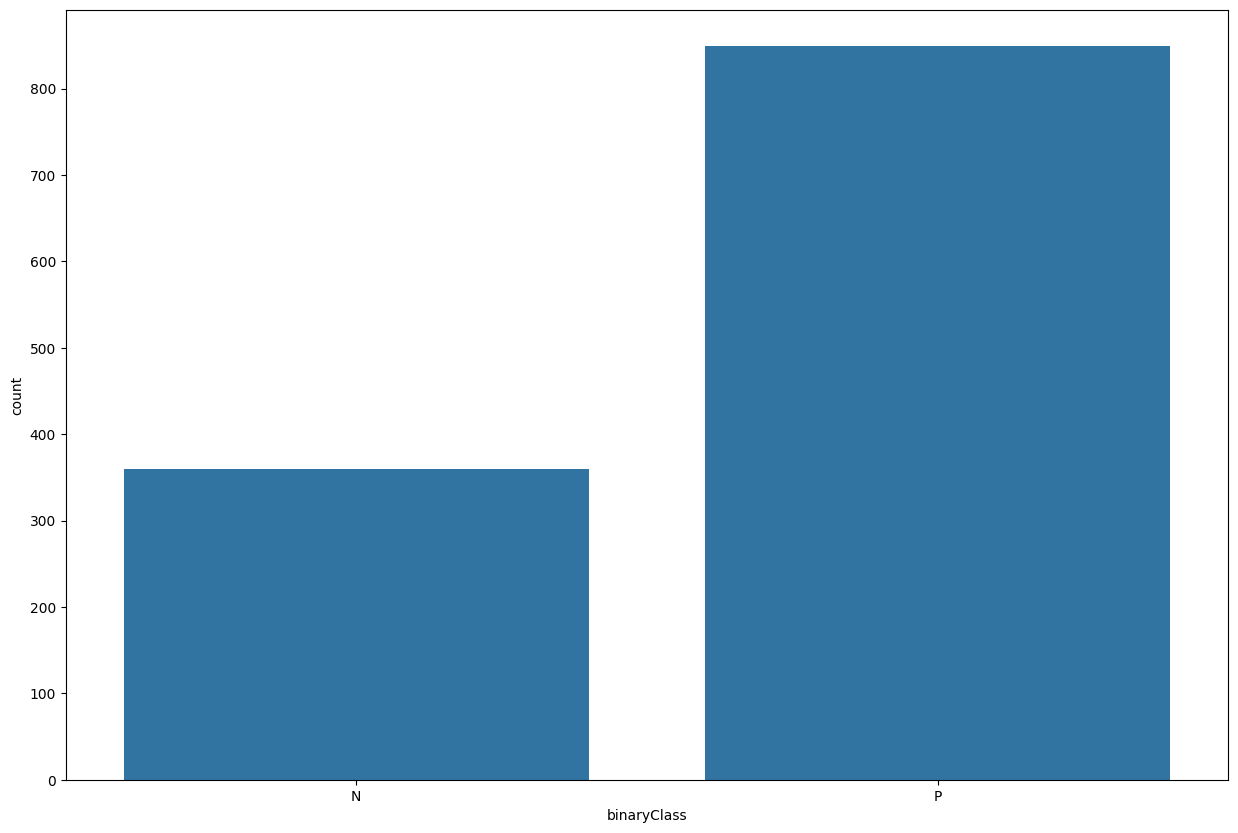

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='binaryClass')

In [ ]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   | 

In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc

In [ ]:
from sklearn.metrics import confusion_matrix
def confusion(input_data,model,labels):
  preds=model.predict(input_data)
  cm=confusion_matrix(labels,preds)
  return cm

In [ ]:
from sklearn.metrics import classification_report
def report(input_data,model,labels):
  preds=model.predict(input_data)
  report=classification_report(labels,preds)
  report=print(report)

In [ ]:
accuracy(car_train_prepared,tree_clf,car_labels_prepared)

1.0

In [ ]:
confusion_matrix(car_labels_prepared,tree_clf.predict(car_train_prepared))

array([[360,   0],
       [  0, 849]])

In [ ]:
classification_report(car_labels_prepared,tree_clf.predict(car_train_prepared))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       360\n           1       1.00      1.00      1.00       849\n\n    accuracy                           1.00      1209\n   macro avg       1.00      1.00      1.00      1209\nweighted avg       1.00      1.00      1.00      1209\n'

In [ ]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params_grid={'max_leaf_nodes':list(range(2,10)),
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3,4],
             'max_depth':[2,3,4,5],
             'max_features':[1,2,3,4,5],
             'max_leaf_nodes':[2,3,4,5]}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),params_grid,verbose=1,cv=3,refit=True)
grid_search.fit(car_train_prepared,car_labels_prepared)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_
{'max_depth':4,
 'max_feature':5,
 'max_leaf_nodes':5,
 'max_lead_nodes':0,
 'min_samples_leaf':0,
 'min_samples_split':0,
}

{'max_depth': 4,
 'max_feature': 5,
 'max_leaf_nodes': 5,
 'max_lead_nodes': 0,
 'min_samples_leaf': 0,
 'min_samples_split': 0}

In [ ]:
tree_best=grid_search.best_estimator_

In [ ]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

[Text(0.2857142857142857, 0.9, 'persons <= 0.5\ngini = 0.5\nsamples = 1209\nvalue = [604.5, 604.5]\nclass = N'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 407\nvalue = [0.0, 289.79]\nclass = P'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'safety <= 0.5\ngini = 0.45\nsamples = 802\nvalue = [604.5, 314.71]\nclass = N'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.19\nsamples = 265\nvalue = [347.588, 41.297]\nclass = N'),
 Text(0.5714285714285714, 0.5, 'safety <= 1.5\ngini = 0.5\nsamples = 537\nvalue = [256.913, 273.413]\nclass = P'),
 Text(0.42857142857142855, 0.3, 'gini = -0.0\nsamples = 269\nvalue = [0.0, 191.532]\nclass = P'),
 Text(0.7142857142857143, 0.3, 'lug_boot <= 1.5\ngini = 0.367\nsamples = 268\nvalue = [256.913, 81.882]\nclass = N'),
 Text(0.5714285714285714, 0.1, 'gini = 0.24\nsamples = 181\nvalue = [219.971, 35.601]\nclass = N'),
 Text(0.8571428571428571, 0.1, 'gini = 0.494\nsamples = 87\n

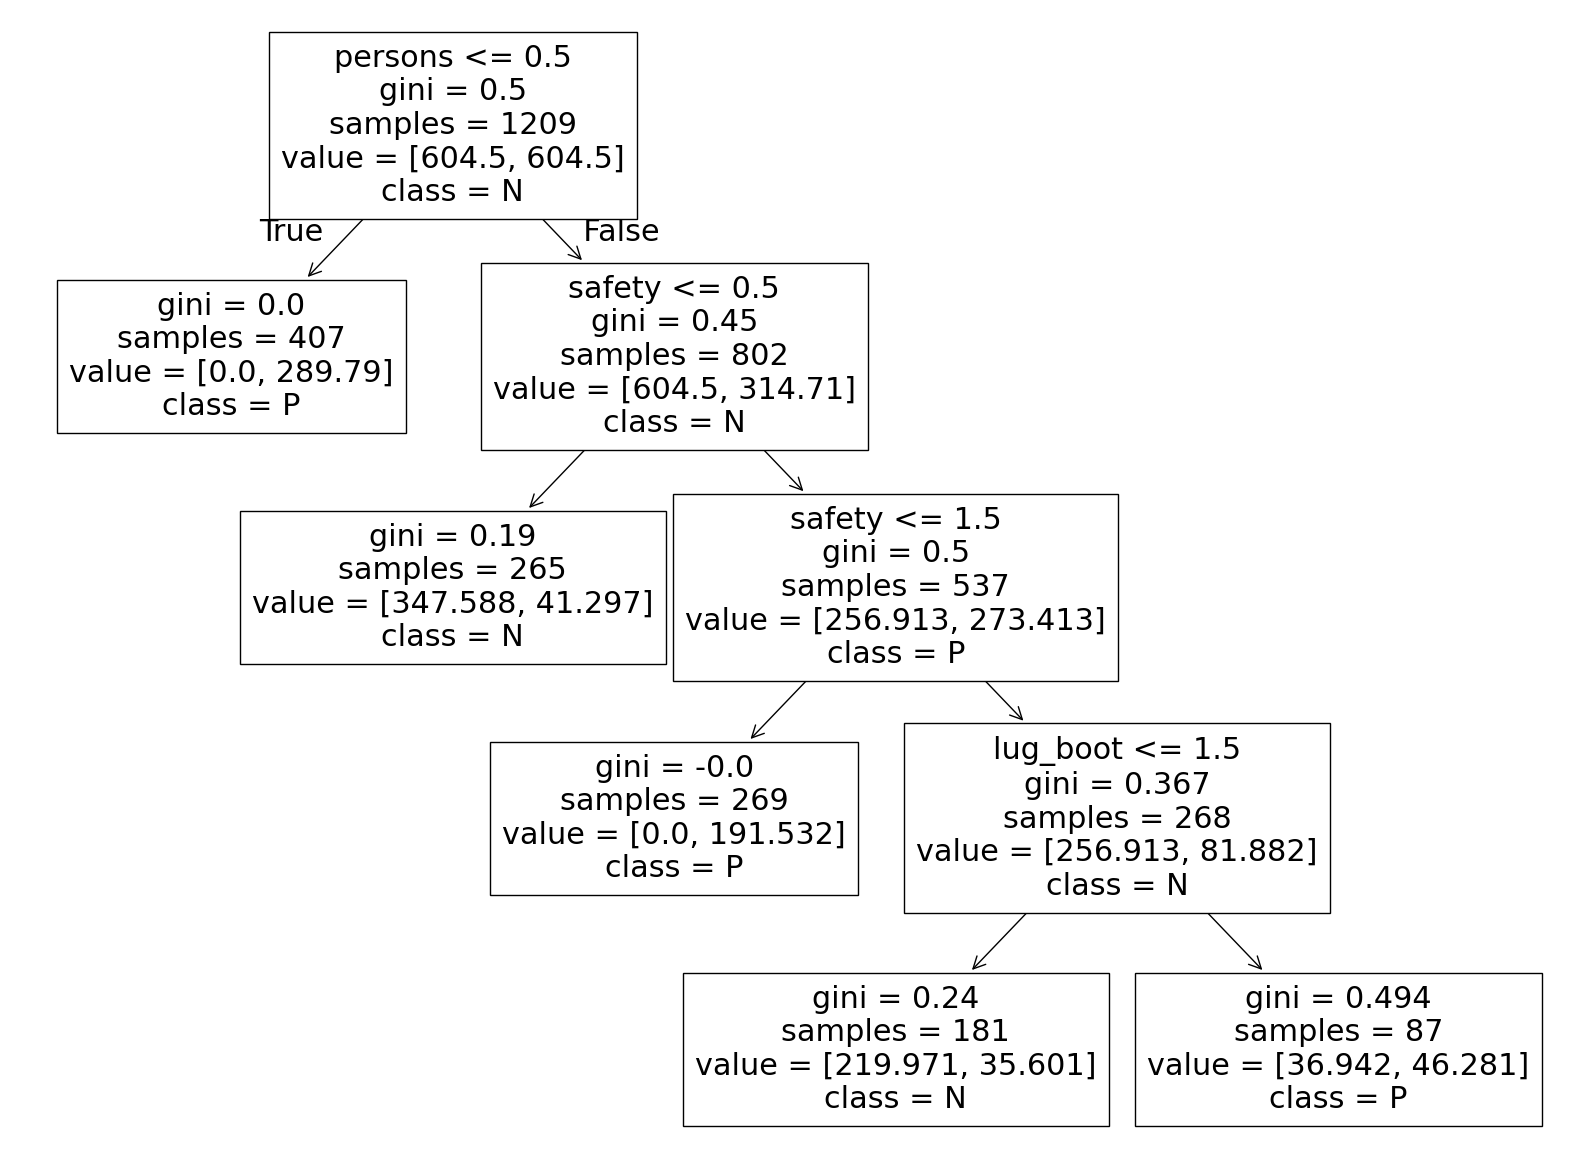

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_best,feature_names=car_train.columns,class_names=['N','P'])